### Using Built-in Methods for User-defined Classes in Python.       

Python has many built-in functions whose behavior can be added to user-built classes to provide additional functionality to objects. This article will help you to understand the concept of operator or function overloading in python. We will apply the concept of function and operator overloading through an example to our classes to make objects more pythonic.

### Built-in Methods      

The Python interpreter has several functions and types built into it that are always available. You can find a list of built-in functions in alphabetic order here on python.org. Alternatively, these functions are located in the __builtins__ module as a dictionary. The keys of this dictionary are the names of functions as shown below.

In [45]:
print([*__builtins__.__dict__])

['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__build_class__', '__import__', 'abs', 'all', 'any', 'ascii', 'bin', 'breakpoint', 'callable', 'chr', 'compile', 'delattr', 'dir', 'divmod', 'eval', 'exec', 'format', 'getattr', 'globals', 'hasattr', 'hash', 'hex', 'id', 'input', 'isinstance', 'issubclass', 'iter', 'len', 'locals', 'max', 'min', 'next', 'oct', 'ord', 'pow', 'print', 'repr', 'round', 'setattr', 'sorted', 'sum', 'vars', 'None', 'Ellipsis', 'NotImplemented', 'False', 'True', 'bool', 'memoryview', 'bytearray', 'bytes', 'classmethod', 'complex', 'dict', 'enumerate', 'filter', 'float', 'frozenset', 'property', 'int', 'list', 'map', 'object', 'range', 'reversed', 'set', 'slice', 'staticmethod', 'str', 'super', 'tuple', 'type', 'zip', '__debug__', 'BaseException', 'Exception', 'TypeError', 'StopAsyncIteration', 'StopIteration', 'GeneratorExit', 'SystemExit', 'KeyboardInterrupt', 'ImportError', 'ModuleNotFoundError', 'OSError', 'EnvironmentError', 'IOError', 'Win

Here note that these built-in functions are methods of certain built-in classes. We can check the built-in methods available for a certain object as shown below.

In [55]:
l = [1,2,3]
print(dir(l))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


When an object or instance of a certain class is passed through the built-in functions, a method is called on that object with relevant arguments. For example, function len() is a built-in function to return the length (the number of items) of an object. Calling len() function with an object as an argument is equivalent to calling the __len__() method on the same object without any argument. In the code below we can see that both the len(obj) and obj.__len__() returns the same output that is the length of a list.

In [50]:
print(len([1,3,3]))
print([1,3,3].__len__())

3
3


Similarly, when we have an operator applied to two objects and the corresponding method to this operator is __op__(), python calls this operator on object 1 and passes the second object as an argument. In the code below, the + operator between object a, and object b is equivalent to calling a method __add__() on a with an argument as b.

In [53]:
a = 1 
b = 2
print(a+b)
print(a.__add__(b))

3
3


So essentially each of these functions (let’s say func()) is a public interface we use to get or update the state of a python object. Behind the scene, when we use the public interface, a method (__func__) is implemented on the object.       

Therefore, we can define these built-in methods in our class and override the behavior of the function or operator associated with them because, backstage, python is going to call our defined method.

Let’s say we want a class representing a family of vectors in a 2-dimensional space. We also want to have some methods for this class such as sum, dot product, and cross-product to perform elementary vector algebraic operations.   

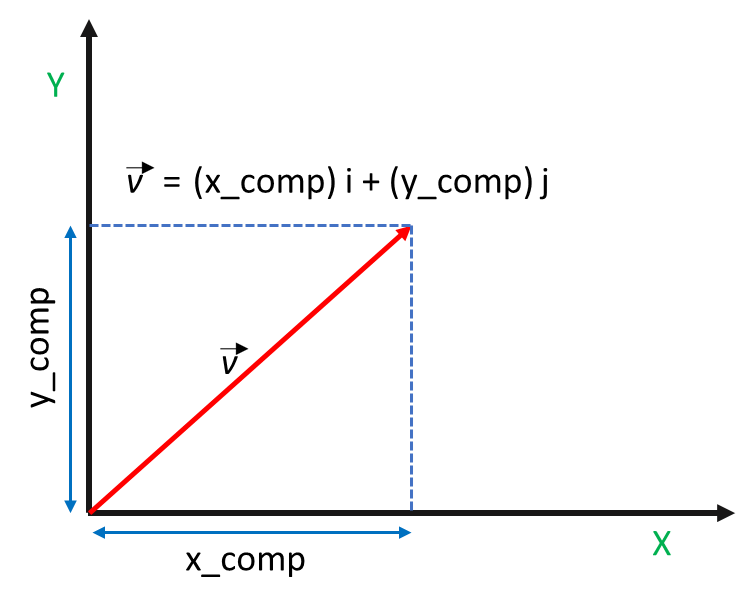     

First, we want to represent our vector using a standard unit vector notation, for instance, ai + bj. For this, someone may decide to implement a method called uni_vect_not() in their class. Alternatively, we can configure the built-in str() (__str__) in such a way that it returns the unit vector notation when given two components of a vector.          

After vector representation, we decide to perform elementary algebraic operations on vectors such as addition, and subtraction. For this, someone may choose to define methods called add_vec(), and sub_vec() respectively in their class. Alternatively, we can configure the built-in ‘+’ and ‘ — ’ operators in such a way that it returns the sum and difference of two vectors.            

As discussed earlier, these built in methods are called using higher level functions and operators (signs). If we want to use these builit-in methods for our classes, we have to define them within our class definition. This will override behaviour of the function and operator associated with the objects.  

#### Using str() to print objects      

The str() function returns a string version of an object and if object is not provided it returns an empty string. Calling str(object) is equivalent to object.__str__(), which return the informal or nicely printable string representation of object. If an object doesn’t have a __str__() method, then str() will return repr(object).       

Let’s define a pretty string representation using str() function for a vector object for our class Vector.

In [118]:
class Vector:
    """A class for family of vectors in 2-D"""
    
    def __init__(self, x_comp, y_comp): #attribut x and y components to object
        self.x_comp = x_comp
        self.y_comp = y_comp
        
    def __str__(self):
        if self.y_comp >= 0: #condition to handle positive and negative y component
            return str(f'{self.x_comp}i + {self.y_comp}j')
        else:
            return str(f'{self.x_comp}i - {abs(self.y_comp)}j')
        
v = Vector(2,-3)
v

We see here the output as an Vector object at a certain memory location. But this is not the standard unit vector notation. Let’s use user-defined str() function on our object to get the unit vector notation.

In [119]:
str(v)   #much better

'2i - 3j'

#### Using arithamatic operators for vector algebra      

The operators ‘+’, ‘-’, ‘*’, ‘@’ etc., are used for arithematic operations in python. When we use ‘+’, ‘-’, ‘*’, and ‘@’ operators on two or more objects, python interpreter calls built-in functions __add__, __sub__, __mul__, and __matmul__, respectively on those objects. For instance, to evaluate the expression a+ b, where a is an instance of class a that has an __add__() method, a.__add__(b) is called.          

Let’s implement these operators for our vector class to add, subtract, and multiply two vectors. For multiplication, ‘*’ operator is used to get dot product of two vectors while ‘@’ operator is used to get cross product of two vectors. The following code shows implementation of these methods in our class Vector.

In [114]:
class Vector:
    """A class for family of vectors in 2-D"""
    
    def __init__(self, x_comp, y_comp): #attribut x and y components to object
        self.x_comp = x_comp
        self.y_comp = y_comp
        
    def __str__(self):
        if self.y_comp >= 0: #condition to handle positive and negative y component
            return str(f'{self.x_comp}i + {self.y_comp}j')
        else:
            return str(f'{self.x_comp}i - {abs(self.y_comp)}j')
    
    def __add__(self, v1):
        xa = self.x_comp + v1.x_comp
        ya = self.y_comp + v1.y_comp
        return Vector(xa,ya)
    
    def __sub__(self, v1):
        xs = self.x_comp - v1.x_comp
        ys = self.y_comp - v1.y_comp
        return Vector(xs,ys)
    
    def __mul__(self,v1):
        self_list = [self.x_comp, self.y_comp]
        v1_list = [v1.x_comp, v1.y_comp]
        return np.dot(self_list, v1_list)
    
    def __matmul__(self,v1):
        self_list = [self.x_comp, self.y_comp]
        v1_list = [v1.x_comp, v1.y_comp]
        return np.cross(self_list, v1_list)

v = Vector(2,-3)
w = Vector(4, -1)
print(v+w)
print(v*w)
print(v@w)

6i - 4j
11
10


One interesting thing to note here, when we used print(v+w) instead of str() function to return unit vector notation for our vector object, it returned notation correctly. This is because when we use print() statement, __str__() method is called on the object implicitly.   

#### Getting components and length of a vector        

To get the components of vector, we will use the concept of list indexing. The [] operator is called to get an item at a particular index, or to get a value of a certain key in a dictionary, or to obtain a part of sequence through slicing. When we use this operator, the built-in function __getitem__() is called behind the scenes. We will use this operator to get x and y component of our vector. The x component will be accessed using v[i] and similarly the y component will be available using v[j].       

To get the length of a vector, we will use the abs() function in python. As the length(magnitude) of a vector is always an absolute value, it makes sense to use abs() function. The other option is to use len() function, but this function always returns an integer value and the length of a vector can be float. If we use len() function for this purpose, it will give an type error. Let’s implement these two methods in our Vector class to get the components and length of a vector object.

In [115]:
class Vector:
    """A class for family of vectors in 2-D"""
    
    def __init__(self, x_comp, y_comp): 
        self.x_comp = x_comp
        self.y_comp = y_comp
        
    def __str__(self):
        if self.y_comp >= 0: 
            return str(f'{self.x_comp}i + {self.y_comp}j')
        else:
            return str(f'{self.x_comp}i - {abs(self.y_comp)}j')
        
    def __getitem__(self, key):
        if key == 'i':
            return self.x_comp
        elif key == 'j':
            return self.y_comp
        else:
            print('Not a valid key')
            
    def __abs__(self):
        return (self.x_comp ** 2 + self.y_comp ** 2) ** 0.5
        

In [117]:
v = Vector(2,-3)
print(v)
print(v['i'])
print(abs(v))

2i - 3j
2
3.605551275463989


#### Conclusion       

In this article, we have learnt about the built-in python functions and how these functions can be used in user defined classes to make our code more pythonic. We used functions str(), abs() to give additional capabilities to our vector class methods. We also used arithamatic operators such as ‘+’, ‘-’, ‘*’, and ‘@’ to perform vector algebra. Finally, we used the concept of indexing using [] operator to get the components of a vector object.   